# RTD Analysis of Reactor and Prediction of Conversion of a first order reaction

#### Rajas Mehendale
#### 18CHE160
#### TY B. Chem. Engg
#### ICT, Mumbai
<br>



This analyses a tubular reactor and uses different RTD Models to predict the conversion


# RTD Analysis

###### Importing Modules

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

The RTD Data is taken from<br>Elements of Chemical Reaction Engineering, $5^{th}$ Edition, 
<br>Chapter 16, Example 16-1

Importing the Data from an excel file using pandas, 
and performing the RTD analysis in a separate file named "curve_fitting_code.py".

The figure is saved in a pdf file named "rtd data plot"

###### Importing Custom Modules

The RTD Data, as well as the concentration curve is plotted.

The curves fitted are polynomial curves

,t (min),C (mg/L)
0,0.0,0.0
1,0.5,0.6
2,1.0,1.4
3,2.0,5.0
4,3.0,8.0
5,4.0,10.0
6,5.0,8.0
7,6.0,6.0
8,7.0,4.0
9,8.0,3.0


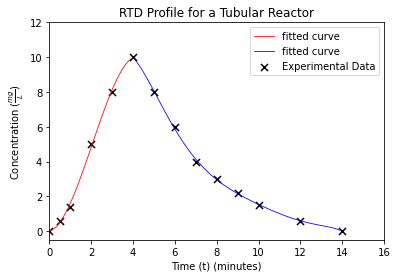

In [2]:
from curve_fitting_code import std_dev, t_mean
plt.savefig('rtd data plot.pdf')

Importing the various conversion models from the file conversion_models.py

All the models are saved in a single class

### Importing the custom class created

In [3]:
import conversion_models as CM
conv_mod = CM.conversion_models()

#### Displaying the RTD Analysis

The mean residence time $(\tau _{mean})$  and the variance $(\sigma ^{2})$ is fed to the models for further calculation.

In [4]:
conv_mod.sigma_sq = std_dev
conv_mod.t_mean = t_mean

In [5]:
print("Mean Residence time is % .3f " %(t_mean) + "minutes")
print("Standard Deviation is % .3f " %(np.sqrt(std_dev)) + "minutes")

Mean Residence time is  5.107 minutes
Standard Deviation is  2.514 minutes



# Conversion Analysis


The reaction is first order in A

$A\rightarrow B$

$r_{A} = -k_{1}*C_{A}$

The value of k will be changed, and the conversion value of A will be checked using different models

In [6]:
k_min = 0.001
k_max = 1.2
steps = 2000
k_range = np.linspace(k_min,k_max,steps)

In [7]:
x_cvdm            = np.zeros((len(k_range),1))
x_ideal_pfr       = np.zeros((len(k_range),1))
x_tanks_in_series = np.zeros((len(k_range),1))
x_single_cstr     = np.zeros((len(k_range),1))


Damkohler Number is $Da_{1}$ for a first order reaction

$Da_{1} = \tau * k_{1}$

## Closed Vessel Dispersion Model

$(\frac{\sigma ^{2}}{\tau ^{2}}) = \frac{2}{{Pe}_{r} ^{2}} * ({Pe}_{r} -1  +  e^{-{Pe}_{r}})$

$q = \sqrt{1 + \frac{4 * Da_{1}}{{Pe}_{r}}}$

$j = \frac{{Pe}_{r} * q}{2}$

$X = 1 - \frac{4 * q * exp({Pe}_{r})}{ {(1+q)}^{2} * exp(j) - {(1-q)}^{2} * exp(-j)}$

## Ideal PFR Behaviour

$X_{A} =(1 - e^{-Da_{1}})$

$X_{A} =(1 - e^{-\tau * k_{1}})$

## Tanks in Series Model

n = $(\frac{\tau ^{2}}{\sigma ^{2}})$

$X_{A} = \frac{1}{({1 + Da_{1}})^{n}}$

## Single CSTR

Here, taking $n=1$ to use the Tanks in Series Model

$X_{A} = \frac{1}{(1 + Da_{1})}$



In [8]:
for i in range(0,len(k_range)):
    conv_mod.k= k_range[i]
    x_cvdm[i]             = conv_mod.closed_vessel_dispersion()
    x_ideal_pfr[i]        = conv_mod.ideal_pfr()
    x_tanks_in_series[i]  = conv_mod.tanks_in_series()
    x_single_cstr[i]      = conv_mod.single_cstr()

#### Plotting the Data
The figure is also saved as pdf file "conversion plot.pdf"

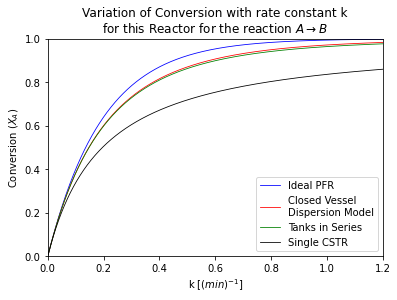

In [9]:
plt.figure()
plt.plot(k_range,x_ideal_pfr,'b',label = "Ideal PFR",linewidth=0.8)
plt.plot(k_range,x_cvdm,'r',label = "Closed Vessel\nDispersion Model",linewidth=0.8)
plt.plot(k_range,x_tanks_in_series,'g',label = "Tanks in Series",linewidth=0.8)
plt.plot(k_range,x_single_cstr,'k',label = "Single CSTR",linewidth=0.8)
title_aaa = "Variation of Conversion with rate constant k\n"
title_aab=  "for this Reactor for the reaction "
title_aac = r"$A \rightarrow B$"
plt.title(title_aaa+title_aab+title_aac)
plt.legend(loc="best")
plt.xlabel("k " +r"$[{(min)}^{-1}]$")
plt.ylabel("Conversion "+ r"($X_{A}$)")
plt.xlim([0, k_max])
plt.ylim([0, 1])
plt.savefig('conversion plot.pdf')